# Taller: Análisis de Tendencias para Google y Microsoft

En este taller analizaremos los datos de precios para Google y Microsoft (símbolos `GOOGL` y `MSFT`) utilizando la base `prices.csv`.

El objetivo es:

- Filtrar los datos para estas dos empresas.
- Convertir la columna de fecha de forma robusta, ya que diferentes empresas pueden tener distintos formatos de fecha.
- Ordenar los datos por fecha.
- Aplicar un suavizado (media móvil) para ver la tendencia general durante el periodo (máximo 2016).
- Generar una gráfica final que integre un storytelling (Setup, Conflict y Resolution) en el análisis de la tendencia.

Responde las siguientes preguntas en el proceso:

1. ¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?
2. ¿Cuántas observaciones tienes para cada empresa?
3. ¿Qué tendencia se observa tras aplicar el suavizado?


In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
!unzip time_series.zip
!cp -r time_series/* ./

--2025-04-10 18:02:23--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip [following]
--2025-04-10 18:02:23--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15602616 (15M) [application/zip]
Saving to: ‘time_series.zip’

time_series.zip     100%[===================>]  14.88M  86.1MB/s    in 0.2s    

2025-04-10 18:02:24 (86.1 MB/s) - ‘time

## Paso 1: Carga del Dataset y Filtrado de Empresas

Carga el archivo `prices.csv` y filtra únicamente los datos correspondientes a Google y Microsoft.

Pregunta: ¿Qué cantidad de observaciones tienes para cada empresa después del filtrado?

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
dt=pd.read_csv('prices.csv')
dt=dt
dt=dt[(dt["symbol"]=="GOOGL") | (dt["symbol"]=="MSFT")]
dt.head()

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0


In [10]:
dt.symbol.value_counts()

,count
symbol,
GOOGL,1762
MSFT,1762


## Paso 2: Conversión Robust a Formato Datetime

Dado que diferentes empresas podrían tener formatos de fecha distintos, convertiremos la columna `date` usando `pd.to_datetime` sin forzar un formato fijo.

Elimina las filas que no se puedan convertir (donde la fecha es `NaT`).

Pregunta: ¿Cuántas filas se descartan por tener fechas inválidas?

In [11]:
dt["date"]=pd.to_datetime(dt["date"])
dt.dropna(inplace=True)
dt

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
...,...,...,...,...,...,...,...
850076,2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0
850576,2016-12-29,MSFT,62.860001,62.900002,62.730000,63.200001,10250600.0
850964,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0


In [12]:
dt.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


**Ninguna fila tiene fechas invalidas**

## Paso 3: Ordenar Datos y Análisis Inicial

Ordena los datos por la columna `date` para cada empresa y determina:

- ¿Cuál es el primer año y el último año para cada empresa?
- ¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [13]:
dt.sort_values(by="date",inplace=True)
dt

,date,symbol,open,close,low,high,volume
440,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
544,2010-01-04,MSFT,30.620001,30.950001,30.590000,31.100000,38409100.0
908,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
1012,2010-01-05,MSFT,30.850000,30.959999,30.639999,31.100000,49749600.0
1376,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
...,...,...,...,...,...,...,...
850076,2016-12-28,MSFT,63.400002,62.990002,62.830002,63.400002,14653300.0
850464,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0
850576,2016-12-29,MSFT,62.860001,62.900002,62.730000,63.200001,10250600.0
850964,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0


In [14]:
primer_año = dt.groupby('symbol')['date'].min().dt.year
último_año = dt.groupby('symbol')['date'].max().dt.year

for empresa, primer_año in primer_año.items():
    último_año_empresa = último_año[empresa]
    print(f"Empresa: {empresa}, Primer año: {primer_año}, Último año: {último_año_empresa}")

Empresa: GOOGL, Primer año: 2010, Último año: 2016
Empresa: MSFT, Primer año: 2010, Último año: 2016


¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [15]:
dt_filtrado = dt[dt['date'].dt.year <= 2016]
total_observaciones = len(dt_filtrado)
print(f"Total de observaciones hasta 2016: {total_observaciones}")

Total de observaciones hasta 2016: 3524


## Paso 4: Visualización Inicial (Setup) – Gráfica de Precios de Cierre

Construye una gráfica inicial que muestre el precio de cierre a lo largo del tiempo para Google y Microsoft.

Utiliza un título multi-línea que comunique la etapa Setup. Por ejemplo:

```
Setup: Serie de Precios sin Suavizado
Datos originales para Google y Microsoft
CONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS
```

Pregunta: ¿Qué diferencias notas entre las series de ambas empresas?

**Durante el período analizado, los precios de ambas empresas van en aumento, pero las acciones de Google crecen a un ritmo más rápido que las de Microsoft. También se nota que las acciones de Google son más inestables, con subidas y bajadas más marcadas en comparación con las de Microsoft, que muestran un comportamiento un poco más estable.**

In [16]:
tablas=pd.tablas_table(dt_filtrado, values='close', index='date', columns='symbol')
tablas

symbol,GOOGL,MSFT
date,,
2010-01-04,626.750011,30.950001
2010-01-05,623.990017,30.959999
2010-01-06,608.260035,30.770000
2010-01-07,594.100015,30.450001
2010-01-08,602.020005,30.660000
...,...,...
2016-12-23,807.799988,63.240002
2016-12-27,809.929993,63.279999
2016-12-28,804.570007,62.990002


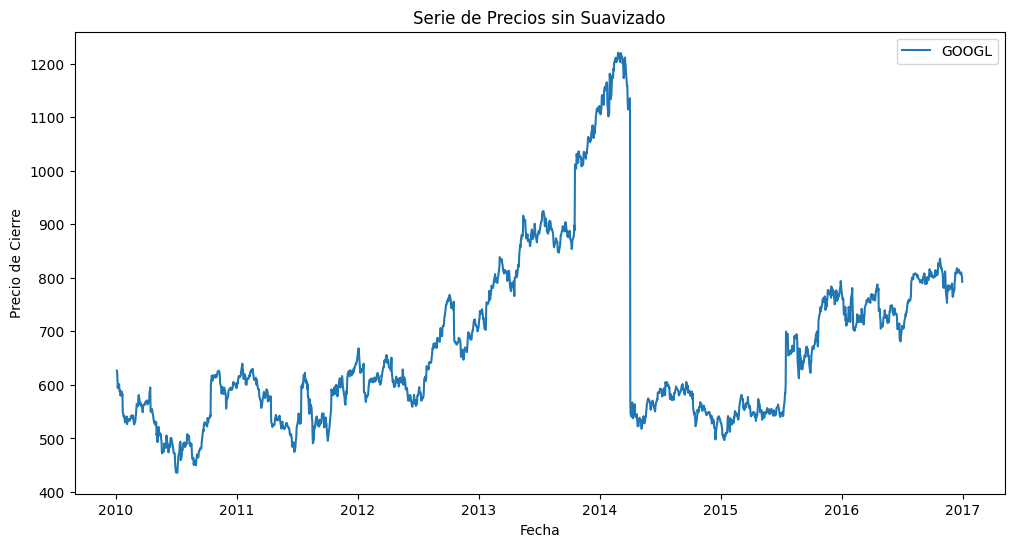

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(tablas.index, tablas['GOOGL'], label='GOOGL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Serie de Precios sin Suavizado')
plt.legend()
plt.show()

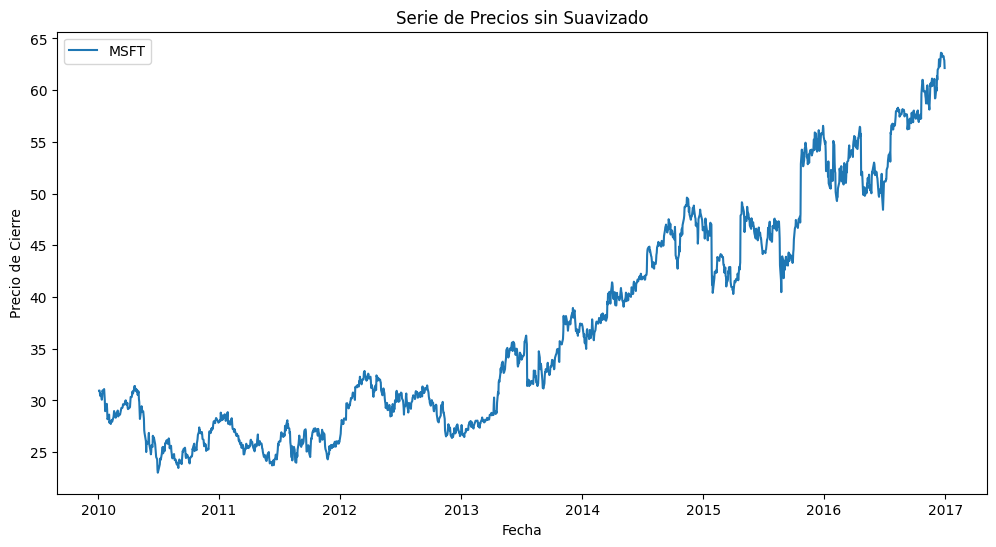

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tablas.index, tablas['MSFT'], label='MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Serie de Precios sin Suavizado')
plt.legend()
plt.show()

#**Paso 5: Aplicar Suavizado (Resolution) – Media Móvil y Análisis de Tendencia**

Aplica un suavizado a las series (por ejemplo, una media móvil) para resaltar la tendencia general en los datos.

Pregunta: ¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016? ¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?

**Considero que una ventana de 50 días es adecuada para observar la tendencia general en 2016, ya que permite ver el comportamiento a largo plazo sin dejarse influir demasiado por las variaciones diarias.**

**Después de suavizar los datos, se nota que Google sigue una tendencia hacia arriba bastante clara y con menos altibajos que antes. En el caso de Microsoft, también va en aumento, pero de forma más suave y con algunos momentos donde crece más lento. Usar la media móvil ayuda mucho a ver mejor cómo se comportan en general.**

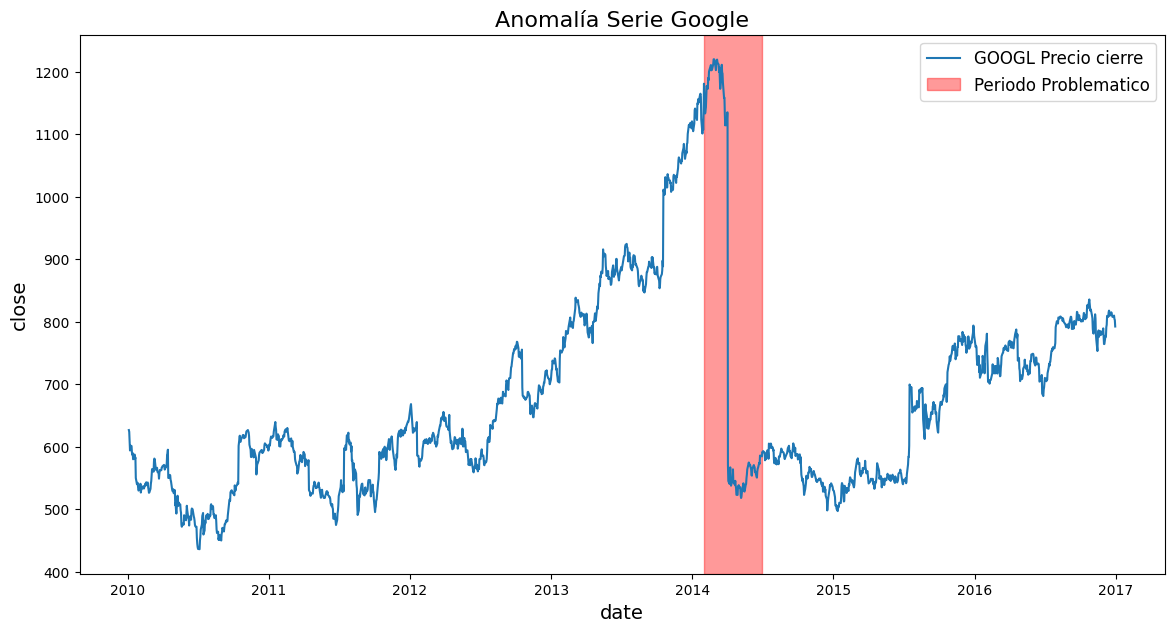

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
iniciog = pd.to_datetime('2014-02-01')
fing= pd.to_datetime('2014-07-01')
plt.figure(figsize=(14, 7))
plt.plot(tablas.index, tablas['GOOGL'], label='GOOGL Precio cierre', linewidth=1.5)
plt.axvspan(iniciog, fing, color='red', alpha=0.4, label='Periodo Problematico')
plt.title('Anomalía Serie Google', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

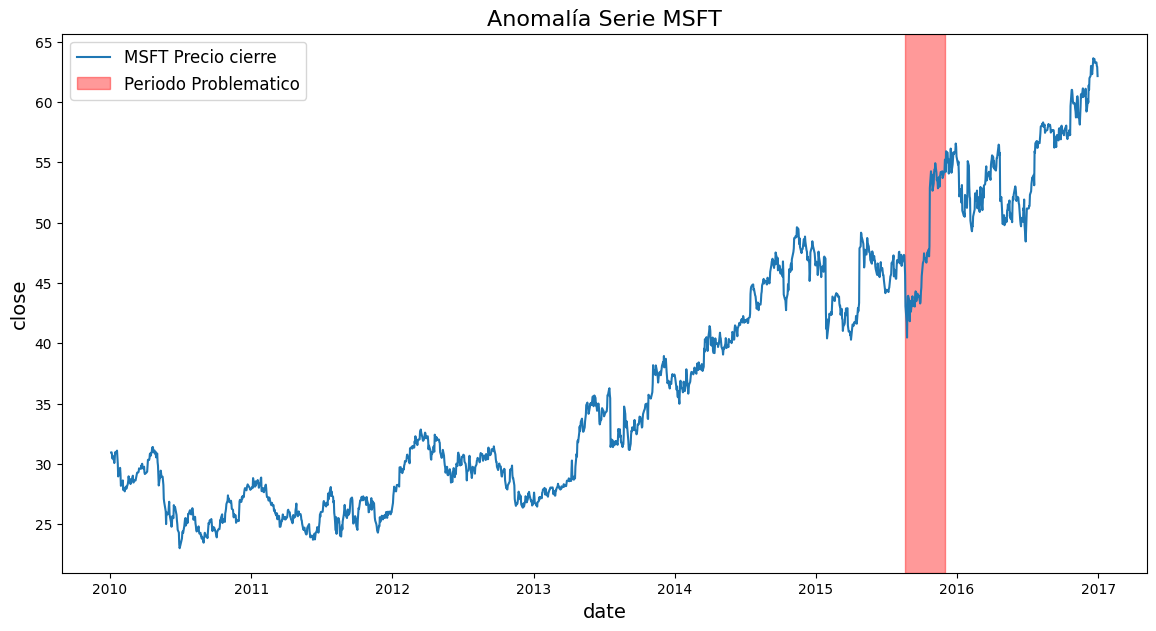

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
iniciom = pd.to_datetime('2015-08-20')
finm = pd.to_datetime('2015-12-01')
plt.figure(figsize=(14, 7))
plt.plot(tablas.index, tablas['MSFT'], label='MSFT Precio cierre', linewidth=1.5)
plt.axvspan(iniciom, finm, color='red', alpha=0.4, label='Periodo Problematico')
plt.title('Anomalía Serie MSFT', fontsize=16)
plt.xlabel('date', fontsize=14)
plt.ylabel('close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

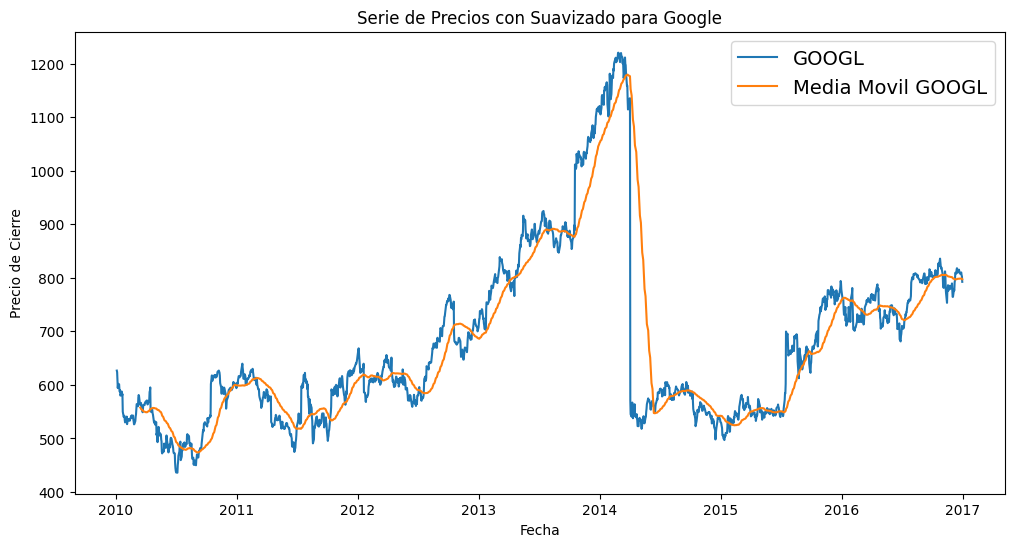

In [69]:
media= tablas.rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(tablas['GOOGL'], label='GOOGL')
plt.plot(media['GOOGL'], label='Media Movil GOOGL')
plt.title('Serie de Precios con Suavizado para Google')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=14)
plt.show()

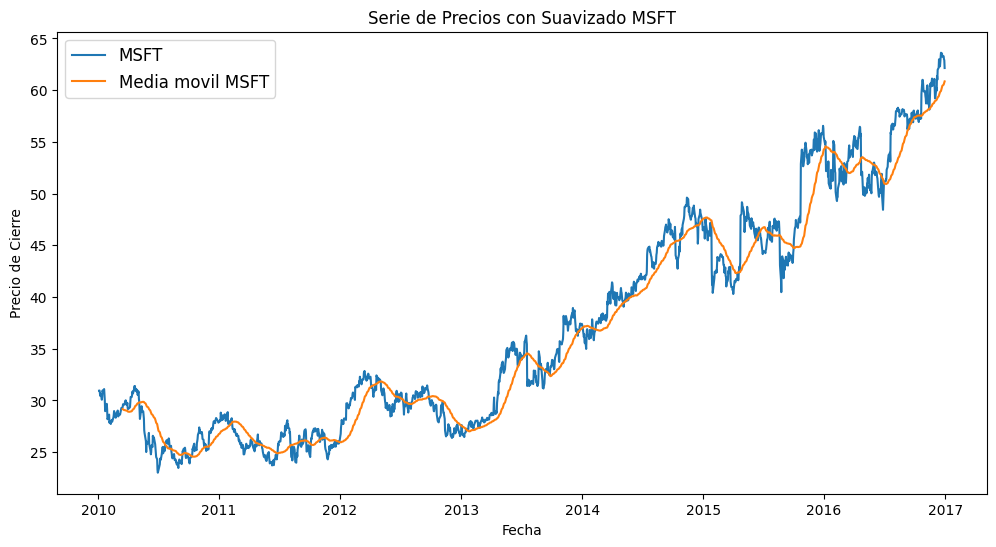

In [70]:
media= tablas.rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(tablas['MSFT'], label='MSFT')
plt.plot(media['MSFT'], label='Media movil MSFT')
plt.title('Serie de Precios con Suavizado MSFT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(fontsize=12)
plt.show()

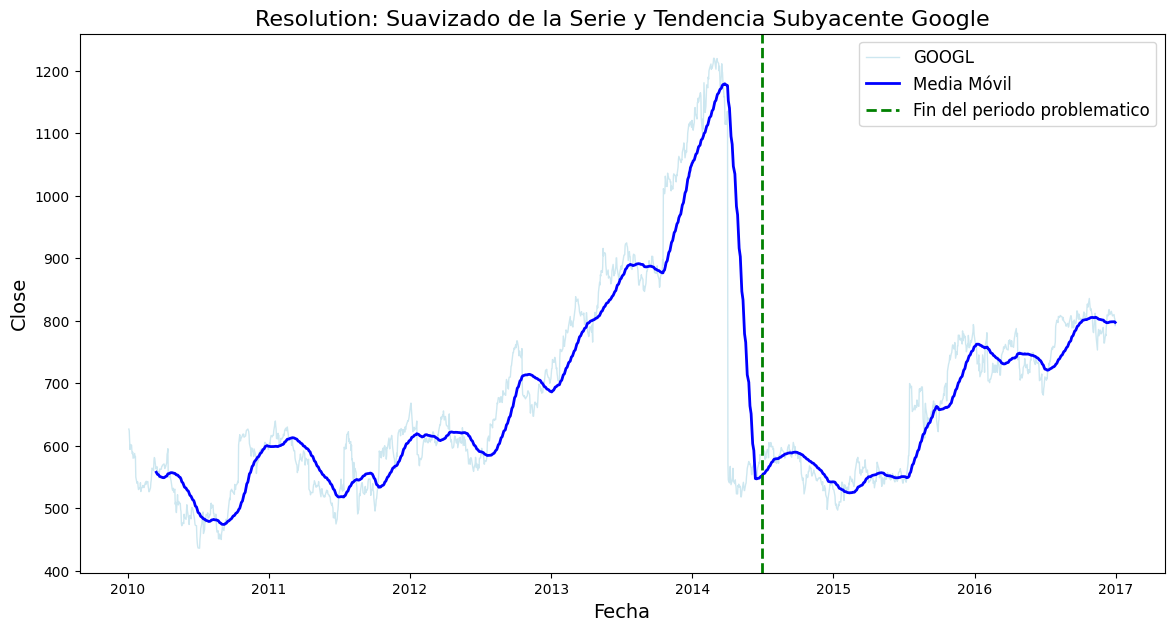

In [71]:
tablas['Media Movil'] = tablas['GOOGL'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(tablas.index, tablas['GOOGL'], label='GOOGL', color='lightblue', linewidth=1, alpha=0.6)
plt.plot(tablas.index, tablas['Media Movil'], label=f'Media Móvil', color='blue', linewidth=2)
plt.axvline(pd.to_datetime(fing), color='green', linestyle='--', linewidth=2, label='Fin del periodo problematico')
plt.title('Resolution: Suavizado de la Serie y Tendencia Subyacente Google', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

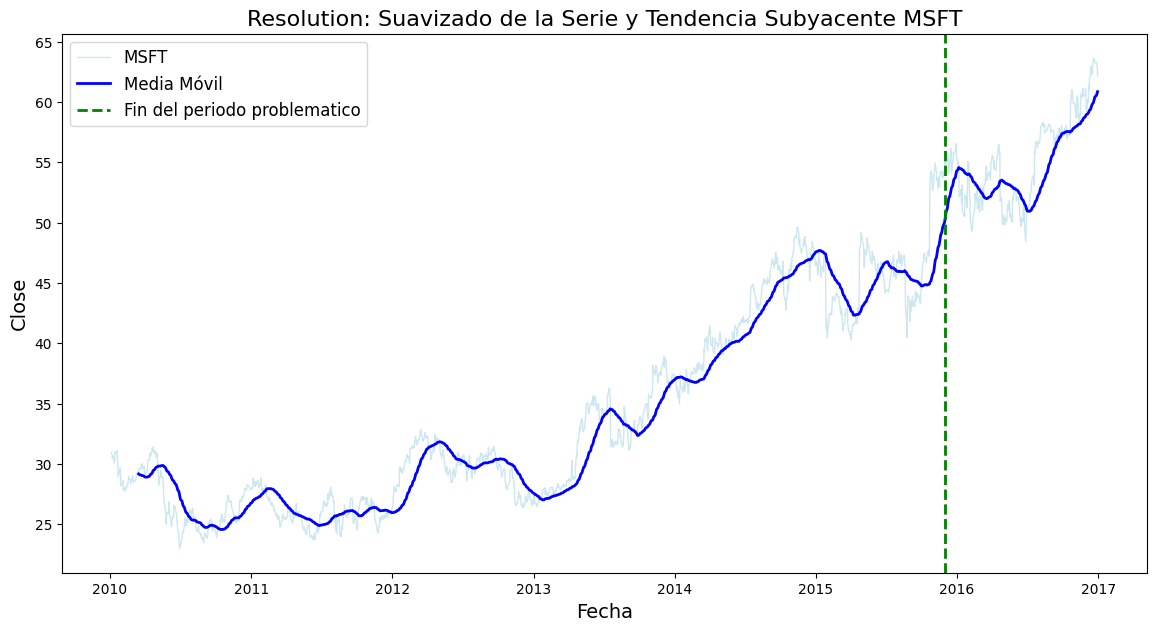

In [72]:
tablas['Media Movil'] = tablas['MSFT'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(tablas.index, tablas['MSFT'], label='MSFT', color='lightblue', linewidth=1, alpha=0.6)
plt.plot(tablas.index, tablas['Media Movil'], label=f'Media Móvil', color='blue', linewidth=2)
plt.axvline(pd.to_datetime(finm), color='green', linestyle='--', linewidth=2, label='Fin del periodo problematico')
plt.title('Resolution: Suavizado de la Serie y Tendencia Subyacente MSFT', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Close', fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Conclusiones y Entrega

En este taller se ha realizado lo siguiente:

- Se cargaron los datos y se filtraron únicamente para las empresas Google y Microsoft.
- Se convirtió la columna `date` de forma robusta, eliminando filas con fechas inválidas.
- Se ordenaron los datos cronológicamente y se obtuvieron información general (primer y último año, número de observaciones por empresa).
- Se construyó una gráfica de storytelling con dos etapas:
  - **Setup:** Visualización inicial de los precios de cierre originales para Google y Microsoft.
  - **Resolution:** Aplicación de un suavizado (media móvil) para resaltar la tendencia general.

Tu entrega final debe incluir las gráficas generadas y una breve explicación de cada paso, respondiendo las preguntas planteadas en el taller.